In [1]:
# Base utilities
import os

# Data Mining
import math
import random
random_state = 42
random.seed(random_state)
seed=random_state
import numpy as np 
import pandas as pd
import geopandas as gpd
import osmnx as ox
import pandana as pdn
import pickle as pkl

# Plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

# Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Directories (Si no existen se crean)
for d in ["data", "logs", "models", "networks"]:
    if not os.path.isdir(d):
        os.mkdir(d)

In [2]:
trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

#print(trips.head().columns)



trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(42500).index)
# Reiniciar los índices
trips.reset_index(drop=True, inplace=True)

trips = trips.sample(frac=1).reset_index(drop=True)



# Model Training and Evaluation

## Train-Test Split

In [3]:
# X = np.array(trips.drop(columns="Modo transporte"))
# y = np.array( trips["Modo transporte"] )

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [4]:
# Load the 'what_if_X' dataframe
what_if_X = pd.read_csv("data/What-if 2_encoded_OK.csv", sep=',', index_col=0)
# Hacer una copia de la columna 'Modo transporte' antes de eliminarla
modo_transporte_copia = what_if_X['Modo transporte'].copy()
# Eliminar las columnas especificadas
what_if_X = what_if_X.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro','Modo transporte'])
    

In [5]:


predicts = pd.DataFrame()

## Model Training/Evaluation Framework

In [6]:
models = {}

def train_evaluate(model, k=10, cross_validation=True):
    model_name = type(model).__name__



    # Final Model
    print("\nFinal Model\n")
    # Model Training
    model = model.fit(X_train, y_train)
    print("Accuracy: ", model.score(X_test, y_test), "\n")
    # Prediction and Report
    y_pred = model.predict(X_test)
    #print("Classification Report\n")
    #print(metrics.classification_report(y_test, y_pred), "\n")
   



    # Make predictions on 'what_if_X'
    what_if_y_pred = model.predict(what_if_X)


    # Suponiendo que what_if_y_pred es tu variable de interés

    # Add a new column "Mobility choice" to the dataframe with predictions
    predicts["Mobility choice"] = what_if_y_pred
    print(predicts["Mobility choice"].value_counts())

 
    

    # # Save the modified dataframe to a new CSV file
    # what_if_X.to_csv("data/What-if 1_pred_OK.csv")

Decoded data of the What-if

## Model Definition and Evaluation

## Random Forest

In [7]:
for i in range(100):

    trips = pd.read_csv(f"data/Guadalajara_encoded_SEMS + NO SEMS_OK.csv",index_col=0)
    trips = trips.drop(columns=['Centro específico','Tiempo origen-destino','Latitud','Longitud','Latitud_centro','Longitud_centro'])

    #print(trips.head().columns)
    trips = trips.drop(trips[trips['Modo transporte'] == 'Public Transportation'].sample(42500).index)
    # Reiniciar los índices
    trips.reset_index(drop=True, inplace=True)
    trips = trips.sample(frac=1).reset_index(drop=True)

    X = np.array(trips.drop(columns="Modo transporte"))
    y = np.array( trips["Modo transporte"] )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)




    
    rf = RandomForestClassifier(n_estimators=20, random_state=random_state)
    train_evaluate(rf)
    
    column_name = f"Run_{i}"
    predicts.rename(columns={"Mobility choice": column_name}, inplace=True)
  

# Agregar de nuevo la columna 'Modo transporte' al DataFrame
what_if_X['Modo transporte'] = modo_transporte_copia
what_if_X = pd.concat([what_if_X, predicts], axis=1)

#Save the modified dataframe to a new CSV file
what_if_X.to_csv("data/What-if 2_pred_OK.csv")


Final Model

Accuracy:  0.7570799954868555 

Walk                     14802
Public Transportation     3209
Private auto               377
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7497461356199933 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15339
Public Transportation     2880
Private auto               169
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7602391966602731 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15087
Public Transportation     3091
Private auto               210
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7604648538869457 

Walk                     11844
Public Transportation     6213
Private auto               331
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7579826243935462 

Walk                     14005
Public Transportation     3906
Private auto               477
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7450073338598668 

Walk                     13498
Public Transportation     4474
Private auto               416
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.755613223513483 

Walk                     15057
Public Transportation     2972
Private auto               359
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7609161683402911 

Walk                     15192
Public Transportation     2883
Private auto               313
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7543721087667833 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12029
Public Transportation     5947
Private auto               412
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7550490804468013 

Walk                     13697
Public Transportation     4383
Private auto               308
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7576441385535372 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13729
Public Transportation     4407
Private auto               252
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7430892474331491 

Walk                     15771
Public Transportation     2470
Private auto               147
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7565158524201737 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13691
Public Transportation     4389
Private auto               308
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7570799954868555 

Walk                     13290
Public Transportation     4722
Private auto               376
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7596750535935913 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12514
Public Transportation     5588
Private auto               286
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7561773665801648 

Walk                     14426
Public Transportation     3591
Private auto               371
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7570799954868555 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14883
Public Transportation     3264
Private auto               241
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7550490804468013 

Walk                     12104
Public Transportation     5820
Private auto               464
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7587724246869006 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13448
Public Transportation     4597
Private auto               343
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7571928241001918 

Walk                     15561
Public Transportation     2736
Private auto                91
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7566286810335101 

Walk                     14569
Public Transportation     3541
Private auto               278
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7548234232201286 

Walk                     14461
Public Transportation     3688
Private auto               239
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7620444544736545 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14922
Public Transportation     3115
Private auto               351
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7627214261536726 

Walk                     12535
Public Transportation     5498
Private auto               355
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7584339388468916 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15513
Public Transportation     2549
Private auto               326
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7543721087667833 

Walk                     13814
Public Transportation     4186
Private auto               388
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7619316258603182 

Walk                     13847
Public Transportation     4210
Private auto               331
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7567415096468464 

Walk                     12018
Public Transportation     5957
Private auto               413
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7518898792733837 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12616
Public Transportation     5449
Private auto               323
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7496333070066569 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13908
Public Transportation     4154
Private auto               326
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7673473993004626 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14265
Public Transportation     3657
Private auto               466
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7541464515401106 

Walk                     12402
Public Transportation     5842
Private auto               144
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7477152205799391 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13027
Public Transportation     5003
Private auto               358
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7512129075933657 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12394
Public Transportation     5832
Private auto               162
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7506487645266839 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15489
Public Transportation     2620
Private auto               279
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7587724246869006 

Walk                     13624
Public Transportation     4334
Private auto               430
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7627214261536726 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15133
Public Transportation     2846
Private auto               409
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7558388807401557 

Walk                     12820
Public Transportation     5282
Private auto               286
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7558388807401557 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13363
Public Transportation     4902
Private auto               123
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7553875662868104 

Walk                     13641
Public Transportation     4413
Private auto               334
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7646395125803904 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14157
Public Transportation     3800
Private auto               431
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7560645379668284 

Walk                     13489
Public Transportation     4691
Private auto               208
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7619316258603182 

Walk                     13092
Public Transportation     4854
Private auto               442
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.759900710820264 

Walk                     15452
Public Transportation     2521
Private auto               415
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.755613223513483 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14236
Public Transportation     3889
Private auto               263
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7526796795667381 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14282
Public Transportation     3871
Private auto               235
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.754597765993456 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12214
Public Transportation     5741
Private auto               433
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7608033397269548 

Walk                     13516
Public Transportation     4543
Private auto               329
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7578697957802099 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14355
Public Transportation     3541
Private auto               492
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7518898792733837 

Walk                     15132
Public Transportation     2986
Private auto               270
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7518898792733837 

Walk                     14185
Public Transportation     3849
Private auto               354
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7541464515401106 

Walk                     13561
Public Transportation     4515
Private auto               312
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7544849373801196 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14661
Public Transportation     3344
Private auto               383
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7571928241001918 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     15482
Public Transportation     2748
Private auto               158
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7627214261536726 

Walk                     13659
Public Transportation     4418
Private auto               311
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7492948211666478 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14044
Public Transportation     3742
Private auto               602
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.755613223513483 

Walk                     12566
Public Transportation     5241
Private auto               581
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7606905111136184 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14489
Public Transportation     3440
Private auto               459
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7536951370867652 

Walk                     14696
Public Transportation     3374
Private auto               318
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7507615931400203 

Walk                     13517
Public Transportation     4482
Private auto               389
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7561773665801648 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14429
Public Transportation     3514
Private auto               445
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7586595960735643 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14123
Public Transportation     4065
Private auto               200
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7565158524201737 

Walk                     12061
Public Transportation     6006
Private auto               321
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7570799954868555 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13375
Public Transportation     4783
Private auto               230
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7465869344465756 

Walk                     15000
Public Transportation     3221
Private auto               167
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.759223739140246 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     12692
Public Transportation     5392
Private auto               304
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7609161683402911 

Walk                     13619
Public Transportation     4396
Private auto               373
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7585467674602279 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14588
Public Transportation     3592
Private auto               208
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7579826243935462 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     14840
Public Transportation     3021
Private auto               527
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7567415096468464 

Walk                     11950
Public Transportation     5966
Private auto               472
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7606905111136184 

Walk                     12380
Public Transportation     5665
Private auto               343
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.756290195193501 

Walk                     13686
Public Transportation     4363
Private auto               339
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7567415096468464 

Walk                     13941
Public Transportation     4141
Private auto               306
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7536951370867652 

Walk                     15080
Public Transportation     3043
Private auto               265
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7600135394336004 

Walk                     13027
Public Transportation     5175
Private auto               186
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7488435067133025 

Walk                     14136
Public Transportation     4018
Private auto               234
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7580954530068825 

Walk                     12666
Public Transportation     5384
Private auto               338
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7677987137538079 

Walk                     14122
Public Transportation     3951
Private auto               315
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7505359359133477 

Walk                     14725
Public Transportation     3129
Private auto               534
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7629470833803452 

Walk                     13463
Public Transportation     4719
Private auto               206
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7574184813268645 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13974
Public Transportation     4056
Private auto               358
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7524540223400654 

Walk                     13758
Public Transportation     4430
Private auto               200
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7574184813268645 

Walk                     13691
Public Transportation     4217
Private auto               480
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7558388807401557 

Walk                     14864
Public Transportation     3228
Private auto               296
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7608033397269548 



c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Walk                     13537
Public Transportation     4348
Private auto               503
Name: Mobility choice, dtype: int64

Final Model

Accuracy:  0.7574184813268645 

Walk                     14759
Public Transportation     3292
Private auto               337
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7560645379668284 

Walk                     14598
Public Transportation     3475
Private auto               315
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7589980819135733 

Walk                     14348
Public Transportation     3804
Private auto               236
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7591109105269096 

Walk                     13460
Public Transportation     4523
Private auto               405
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7553875662868104 

Walk                     14093
Public Transportation     3818
Private auto               477
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7518898792733837 

Walk                     13772
Public Transportation     4338
Private auto               278
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7620444544736545 

Walk                     13525
Public Transportation     4641
Private auto               222
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7550490804468013 

Walk                     12166
Public Transportation     5722
Private auto               500
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7604648538869457 

Walk                     12618
Public Transportation     5381
Private auto               389
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7584339388468916 

Walk                     12691
Public Transportation     5261
Private auto               436
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7583211102335552 

Walk                     14641
Public Transportation     3343
Private auto               404
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7574184813268645 

Walk                     13579
Public Transportation     4382
Private auto               427
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7555003949001466 

Walk                     13189
Public Transportation     4599
Private auto               600
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.7586595960735643 

Walk                     15068
Public Transportation     2942
Private auto               378
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Final Model

Accuracy:  0.750987250366693 

Walk                     15067
Public Transportation     2926
Private auto               395
Name: Mobility choice, dtype: int64


c:\Users\Edu Bilbao\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [8]:

import pandas as pd

# Tu DataFrame original
what_if_X = pd.read_csv("data/What-if 2_pred_OK.csv", sep=',', index_col=0)

# Imprimir las columnas del DataFrame para verificar los nombres
print(what_if_X.columns)

import pickle

# Definir la lista de columnas que fueron previamente codificadas
columnas_codificadas = ["Centro", "NIVEL", "SEXO", "Situacion conyugal", "MUNICIPIO", "HIJOS", "Material del piso de la casa", "Agua entubada en la casa", "Luz electrica en la casa", "Primer integrante de la familia en asistir a la universidad", "Centro específico"]

# Verificar si las columnas codificadas están presentes en el DataFrame
columnas_a_decodificar = [col for col in columnas_codificadas if col in what_if_X.columns]

# Crear un diccionario para almacenar los encoders correspondientes
encoders = {}

# Iterar sobre las columnas a decodificar y cargar los encoders desde los archivos pickle
for columna in columnas_a_decodificar:
    archivo_encoder_pickle = f"models/encoders/{columna}.pkl"
    
    with open(archivo_encoder_pickle, 'rb') as file:
        encoder = pickle.load(file)
    
    encoders[columna] = encoder

# Decodificar cada columna en el dataframe what_if_X
for columna, encoder in encoders.items():
    what_if_X[columna] = encoder.inverse_transform(what_if_X[columna])

# Guardar el DataFrame decodificado en un nuevo archivo CSV
what_if_X.to_csv("data/What-if 2_predictions_decoded_OK.csv")



Index(['NIVEL', 'CICLO', 'Centro', 'Promedio', 'SEXO', 'EDAD', 'MUNICIPIO',
       'Situacion conyugal', 'HIJOS', 'Personas en la vivienda',
       ...
       'Run_90', 'Run_91', 'Run_92', 'Run_93', 'Run_94', 'Run_95', 'Run_96',
       'Run_97', 'Run_98', 'Run_99'],
      dtype='object', length=120)


In [9]:
# import pandas as pd

# # Cargar el archivo CSV
# file_path = "data/What-if 1_predictions_decoded_OK.csv"
# df = pd.read_csv(file_path)

# # Recuento de valores en la columna 'Modo transporte'
# modo_transporte_counts = df['Modo transporte'].value_counts()

# # Mostrar el recuento de cada valor en 'Modo transporte'
# print("Recuento de valores en 'Modo transporte':")
# print(modo_transporte_counts)

# # Recuento de valores en la columna 'Mobility choice' para cada valor en 'Modo transporte'
# for modo_transporte, count in modo_transporte_counts.items():
#     subset_df = df[df['Modo transporte'] == modo_transporte]
#     mobility_choice_counts = subset_df['Mobility choice'].value_counts()
#     print(f"\nRecuento de valores en 'Mobility choice' para '{modo_transporte}':")
#     print(mobility_choice_counts)


# # Recuento de valores en la columna 'Mobility choice'
# mobility_choice_counts = df['Mobility choice'].value_counts()

# # Mostrar el recuento de cada valor en 'Mobility choice'
# print("Recuento de valores en 'Mobility choice':")
# print(mobility_choice_counts)

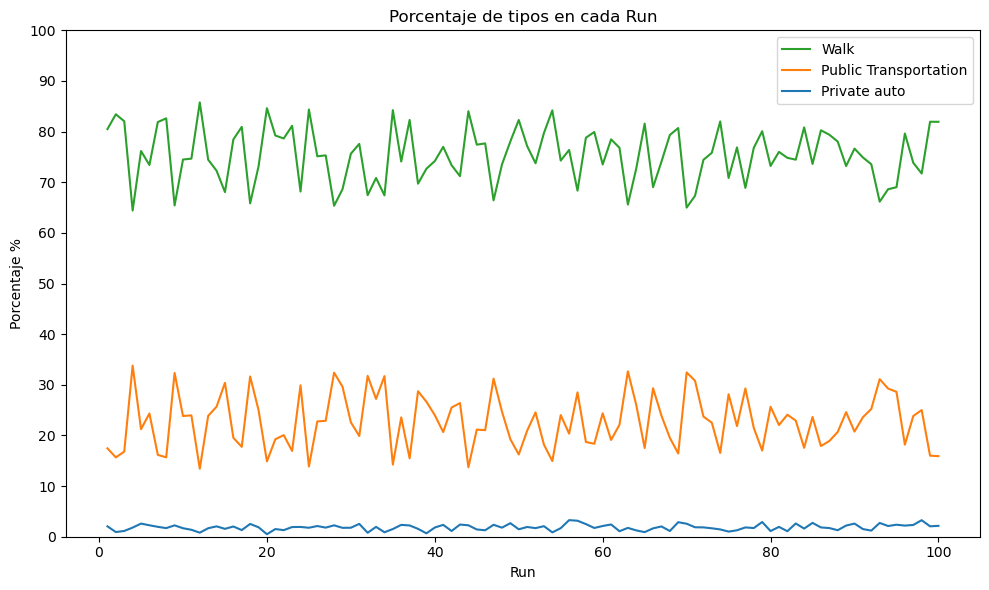

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Graficar los porcentajes con líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Definir los colores para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in percentages_df.columns:
    ax.plot(range(1, len(percentages_df.index) + 1), percentages_df[column], label=column, color=colors[column])

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')  # Cambiar a 'Run' si se desea mantener
ax.set_ylabel('Porcentaje %')
ax.set_title('Porcentaje de tipos en cada Run')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



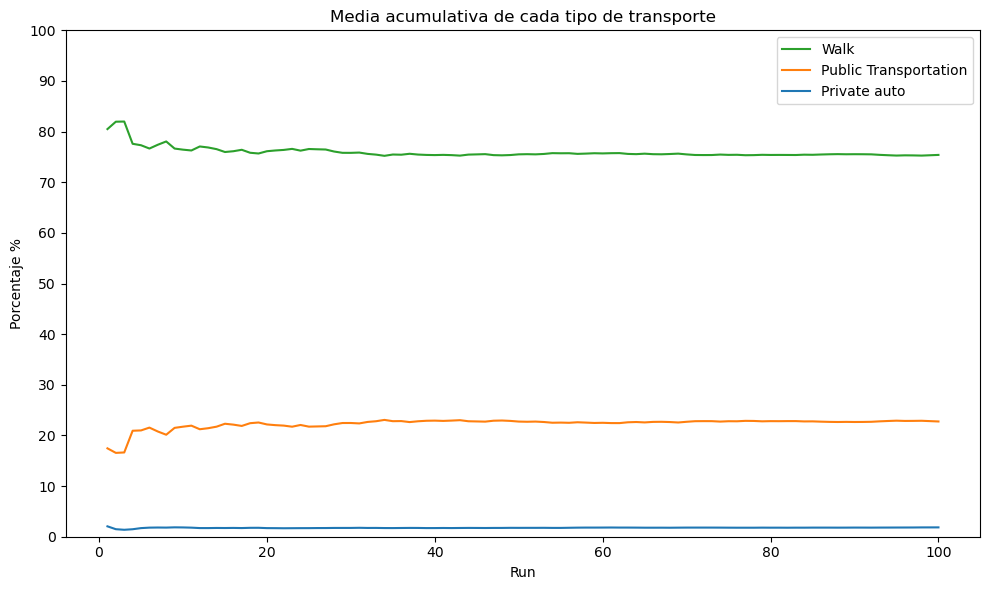

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()

# Graficar la media acumulativa con líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

# Graficar la media acumulativa de cada tipo de transporte con colores específicos
for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


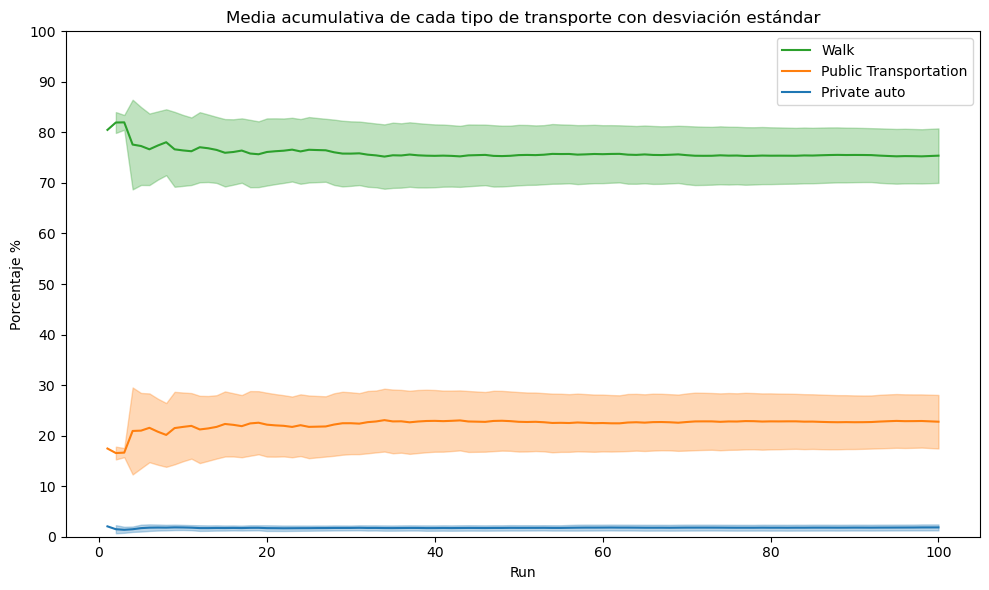

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y la desviación estándar de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
cumulative_std = percentages_df.expanding().std()

# Graficar la media acumulativa con líneas y añadir la desviación estándar como sombreado
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - cumulative_std[column],
                    cumulative_mean[column] + cumulative_std[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con desviación estándar')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

1.9842169515086827


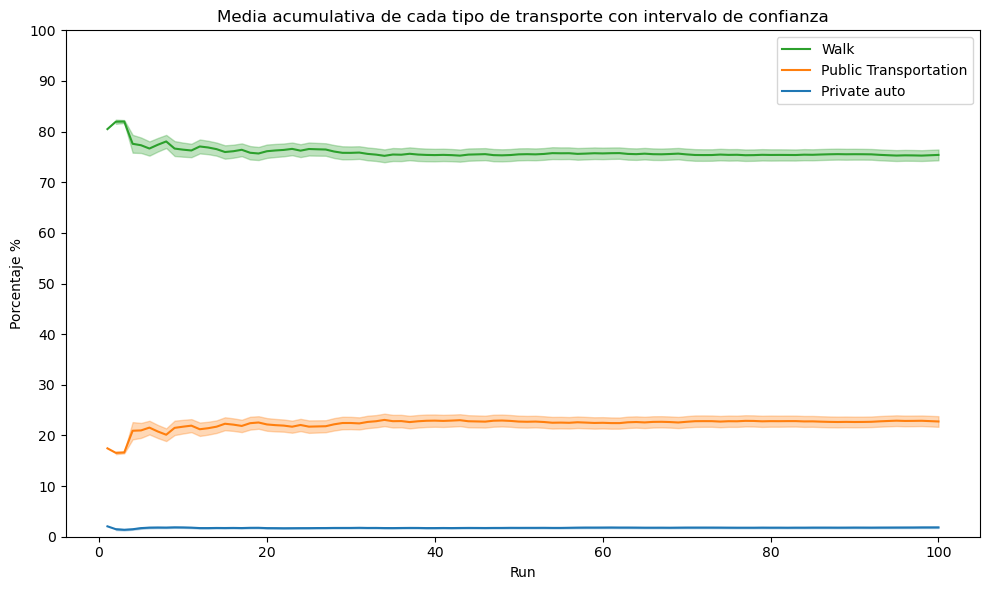

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
print(t_value)
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con intervalo de confianza')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Supongamos que ya tienes calculadas las variables cumulative_mean y margin_error como en tu código anterior

# Número de "Runs" a imprimir cada 10
runs_to_print = 10

# Imprimir la media acumulada y el intervalo de confianza cada 10 "Runs"
for i in range(0, len(cumulative_mean), runs_to_print):
    print(f"Media acumulada hasta el Run {i + runs_to_print}:")
    for column in cumulative_mean.columns:
        mean_value = cumulative_mean[column].iloc[i + runs_to_print - 1]
        error_value = margin_error[column].iloc[i + runs_to_print - 1]
        print(f"{column}: {mean_value:.2f}% ± {error_value:.2f}%")
    print()

Media acumulada hasta el Run 10:
Walk: 76.44% ± 1.39%
Public Transportation: 21.73% ± 1.35%
Private auto: 1.83% ± 0.10%

Media acumulada hasta el Run 20:
Walk: 76.13% ± 1.32%
Public Transportation: 22.17% ± 1.25%
Private auto: 1.70% ± 0.11%

Media acumulada hasta el Run 30:
Walk: 75.80% ± 1.27%
Public Transportation: 22.46% ± 1.21%
Private auto: 1.74% ± 0.10%

Media acumulada hasta el Run 40:
Walk: 75.37% ± 1.23%
Public Transportation: 22.93% ± 1.21%
Private auto: 1.71% ± 0.10%

Media acumulada hasta el Run 50:
Walk: 75.51% ± 1.19%
Public Transportation: 22.74% ± 1.17%
Private auto: 1.75% ± 0.11%

Media acumulada hasta el Run 60:
Walk: 75.69% ± 1.14%
Public Transportation: 22.50% ± 1.11%
Private auto: 1.81% ± 0.11%

Media acumulada hasta el Run 70:
Walk: 75.50% ± 1.14%
Public Transportation: 22.70% ± 1.12%
Private auto: 1.80% ± 0.12%

Media acumulada hasta el Run 80:
Walk: 75.39% ± 1.12%
Public Transportation: 22.82% ± 1.10%
Private auto: 1.79% ± 0.12%

Media acumulada hasta el Run 90:

In [15]:
# Obtener los valores de la media acumulada en el Run 50 para los tres medios de transporte
run_50_cumulative_mean = cumulative_mean.loc['Run_49']

# Mostrar los valores de la media acumulada en el Run 50
print("Valores de la media acumulada en el Run 50:")
print(run_50_cumulative_mean)

Valores de la media acumulada en el Run 50:
Walk                     75.511529
Public Transportation    22.738416
Private auto              1.750054
Name: Run_49, dtype: float64


1.9904502099893602


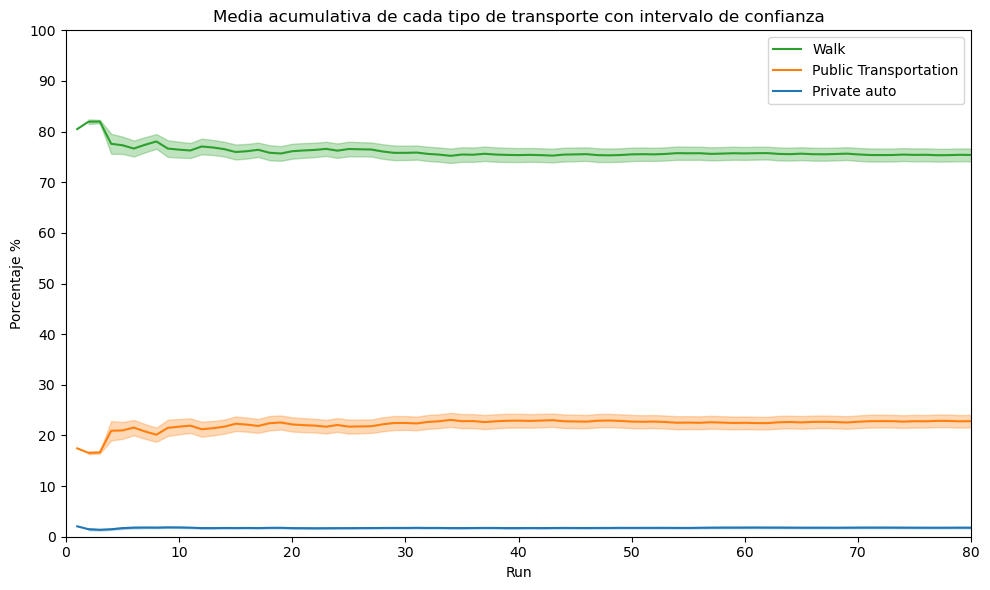

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:80]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
print(t_value)
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 80)  # Limitar el eje x a 80 runs
ax.set_xticks(range(0, 81, 10))  # Ticks en el eje x cada 10 runs

# Añadir etiquetas y leyenda
ax.set_xlabel('Run')
ax.set_ylabel('Porcentaje %')
ax.set_title('Media acumulativa de cada tipo de transporte con intervalo de confianza')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

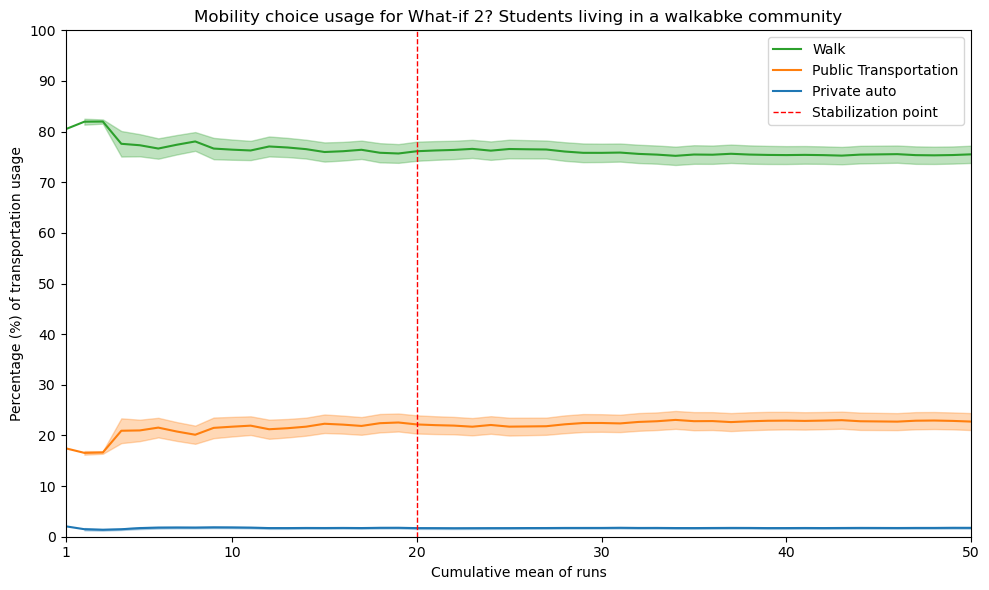

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:50]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Añadir línea vertical en el run 40
ax.axvline(x=20, color='red', linestyle='--', linewidth=1, label='Stabilization point')

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 50)  # Limitar el eje x a 80 runs
ax.set_xticks([1, 10, 20, 30, 40, 50])

# Añadir etiquetas y leyenda
ax.set_xlabel('Cumulative mean of runs')
ax.set_ylabel('Percentage (%) of transportation usage')
ax.set_title('Mobility choice usage for What-if 2? Students living in a walkabke community')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

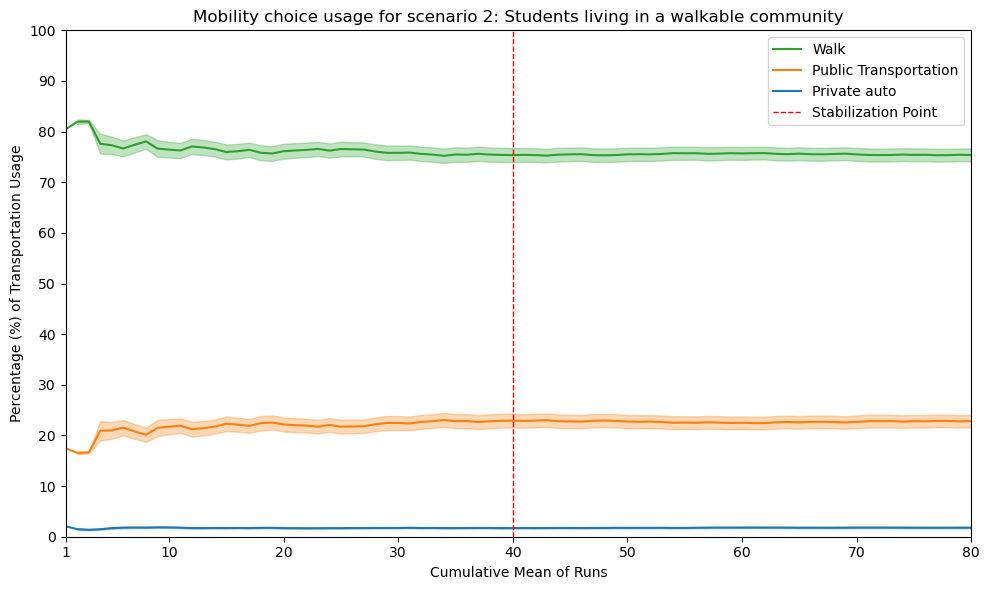

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Cargar el archivo CSV
file_path = "data/What-if 2_predictions_decoded_OK.csv"
df = pd.read_csv(file_path)

# Obtener las columnas que empiezan con "Run_"
run_columns = [col for col in df.columns if col.startswith('Run_')]

# Limitar los run_columns a los primeros 80
run_columns = run_columns[:80]

# Crear un DataFrame para almacenar los porcentajes de cada tipo en cada "Run"
percentages_df = pd.DataFrame()

# Calcular los porcentajes para cada tipo en cada "Run"
for col in run_columns:
    total = df[col].count()
    percentages_df[col] = df[col].value_counts() / total * 100

# Transponer el DataFrame para que los "Run" estén en filas y los tipos en columnas
percentages_df = percentages_df.transpose()

# Calcular la media acumulativa y el intervalo de confianza de cada tipo de transporte
cumulative_mean = percentages_df.expanding().mean()
n = len(percentages_df)
alpha = 0.05  # Nivel de confianza del 95%
t_value = t.ppf(1 - alpha / 2, n - 1)  # Valor t para el intervalo de confianza
margin_error = t_value * percentages_df.expanding().std() / np.sqrt(n)

# Graficar la media acumulativa con líneas y añadir el intervalo de confianza
fig, ax = plt.subplots(figsize=(10, 6))

# Colores específicos para cada tipo de transporte
colors = {'Private auto': 'tab:blue', 'Public Transportation': 'tab:orange', 'Walk': 'tab:green'}

for column in cumulative_mean.columns:
    ax.plot(range(1, len(cumulative_mean) + 1), cumulative_mean[column], label=column, color=colors[column])
    ax.fill_between(range(1, len(cumulative_mean) + 1),
                    cumulative_mean[column] - margin_error[column],
                    cumulative_mean[column] + margin_error[column],
                    color=colors[column], alpha=0.3)

# Añadir línea vertical en el run 40
ax.axvline(x=40, color='red', linestyle='--', linewidth=1, label='Stabilization Point')

# Ajustar la escala del eje y de 0 a 100% y los ticks cada 10
ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))
ax.set_xlim(1, 80)  # Limitar el eje x a 80 runs
ax.set_xticks([1, 10, 20, 30, 40, 50, 60, 70, 80])

# Añadir etiquetas y leyenda
ax.set_xlabel('Cumulative Mean of Runs')
ax.set_ylabel('Percentage (%) of Transportation Usage')
ax.set_title('Mobility choice usage for scenario 2: Students living in a walkable community')
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()